# Data Preprocessing Pipeline

In [ ]:
import numpy as np 
import pandas as pd 

In [ ]:
TRUE_PATH = 'a1_True.csv'
FAKE_PATH = 'a2_Fake.csv'

In [3]:
True_df = pd.read_csv(TRUE_PATH)
Fake_df = pd.read_csv(FAKE_PATH)

In [ ]:
True_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [8]:
Fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
True_df.shape, Fake_df.shape

((21417, 4), (23481, 4))

## Inspecting Duplicate values

In [6]:
True_df.duplicated().sum() , Fake_df.duplicated().sum()

(206, 3)

In [ ]:
True_df = True_df.drop_duplicates()
Fake_df = Fake_df.drop_duplicates()

In [7]:
Fake_df.isnull().sum()
True_df.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

## Assigning Labels to the category

In [9]:
True_df['label'] = 1
Fake_df['label'] = 0

## Concatenating both the datasets into a single dataframe

In [11]:
df = pd.concat([True_df,Fake_df])
df = df.sample(frac=1).reset_index(drop=True)
print(df.shape)

(44898, 5)


## EDA to evaluate the distribution of News types

### Bar Distribution of Fake and Real News

/var/folders/m8/j5rk00d11n39mm1zv05jr_3w0000gn/T/ipykernel_17031/2193037538.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='label', palette='pastel', edgecolor='black')


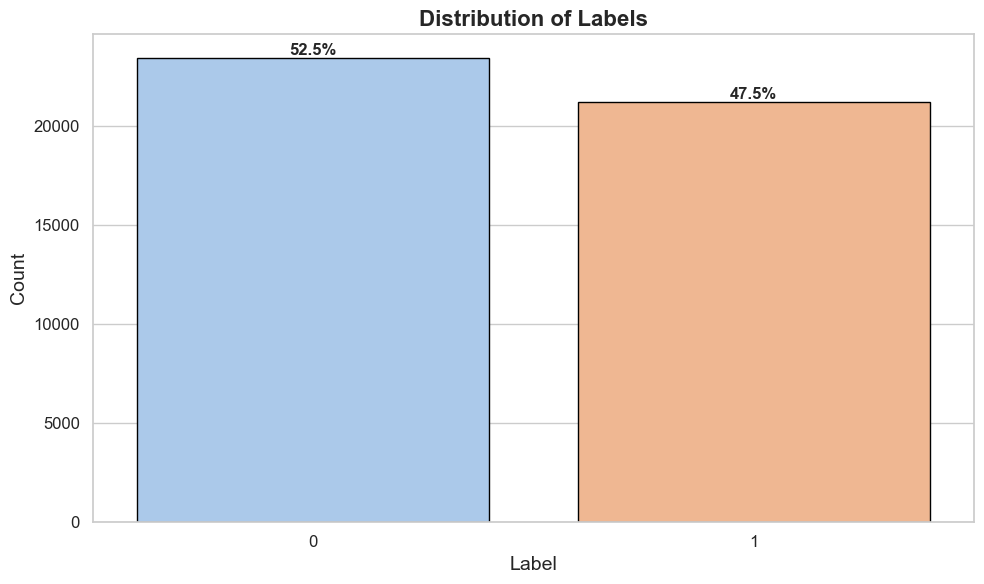

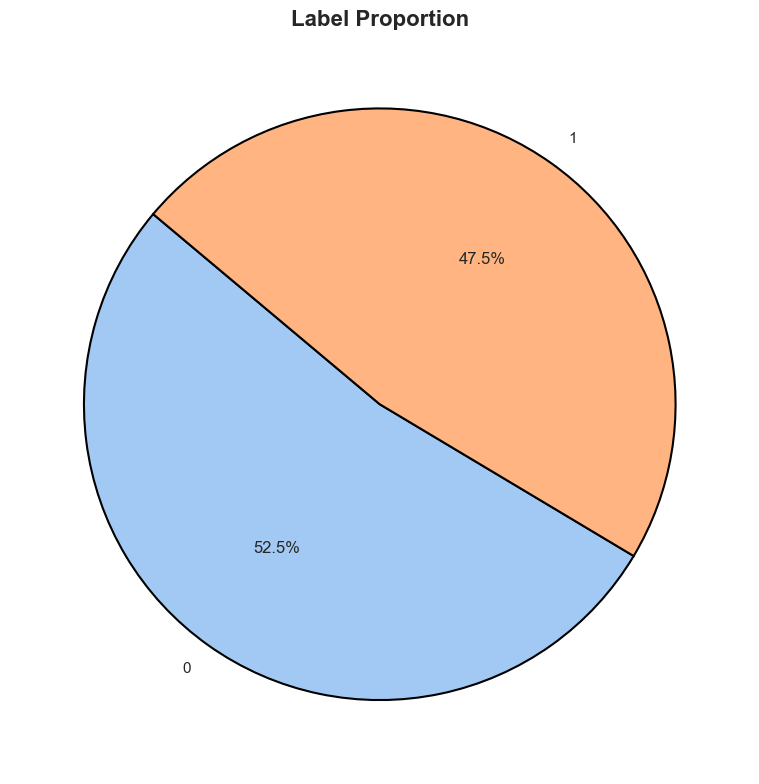

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='label', palette='pastel', edgecolor='black')

total = len(df)
for p in ax.patches:
    count = p.get_height()
    percentage = f'{100 * count / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('Distribution of Labels', fontsize=16, fontweight='bold')
plt.xlabel('Label', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 8))
colors = sns.color_palette('pastel')
label_counts = df['label'].value_counts()
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})
plt.title('Label Proportion', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### Distribution of News by Subject

/var/folders/m8/j5rk00d11n39mm1zv05jr_3w0000gn/T/ipykernel_17031/2528535604.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='subject', palette='pastel', edgecolor='black')


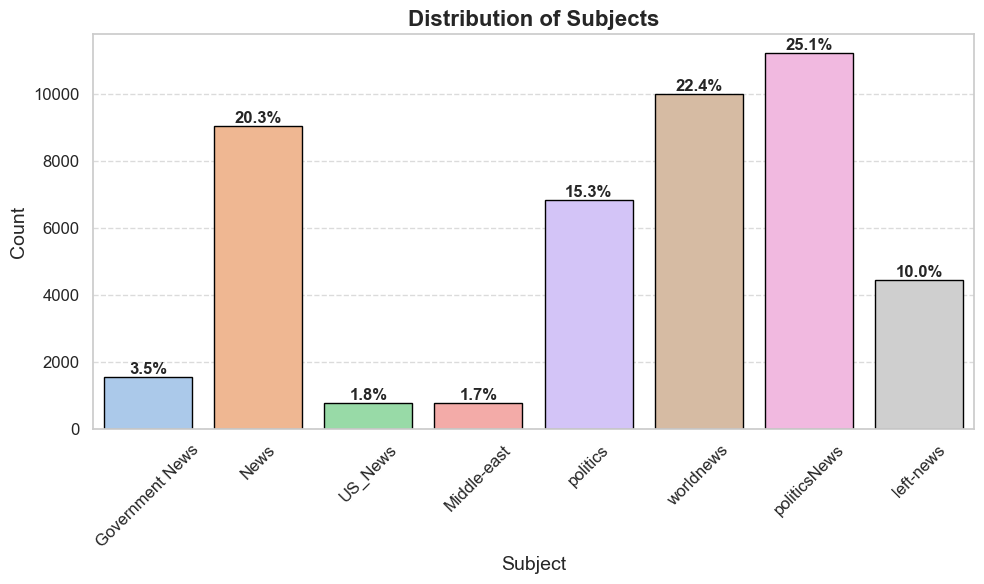

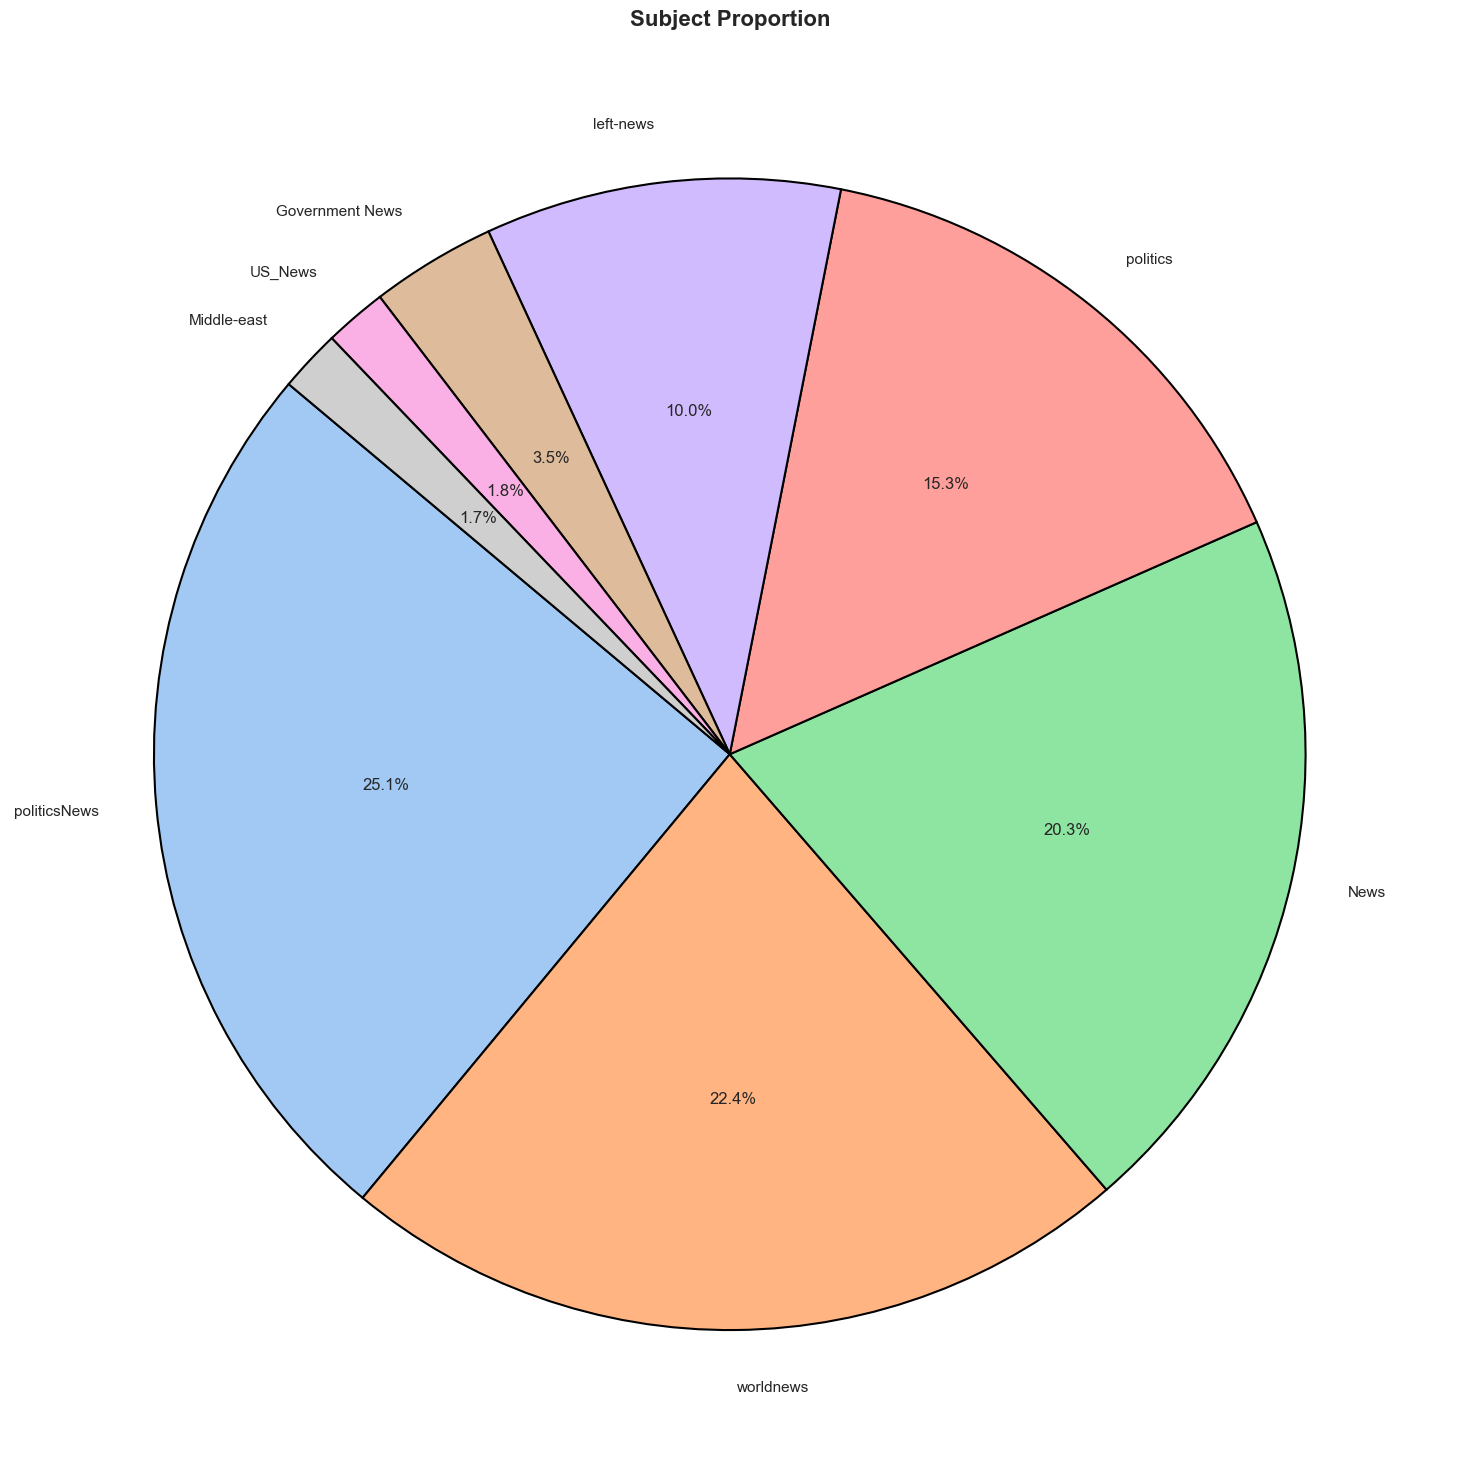

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='subject', palette='pastel', edgecolor='black')

total = len(df)
for p in ax.patches:
    count = p.get_height()
    percentage = f'{100 * count / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('Distribution of Subjects', fontsize=16, fontweight='bold')
plt.xlabel('Subject', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 15))
colors = sns.color_palette('pastel')
subject_counts = df['subject'].value_counts()

plt.pie(subject_counts, labels=subject_counts.index, autopct='%1.1f%%', startangle=140, colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})
plt.title('Subject Proportion', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## Further Preprocessing

### Merging the News with it's title

In [16]:
df['news'] = df['title'] + ' ' + df['text']

In [36]:
df['news']

0        WATCH HILLARY SQUIRM When Mainstream Media Ask...
1         Racist Hacker Remotely Controlled College Pri...
2        Five Things You Need to Know About CrowdStrike...
3         Franklin Graham’s Daughter: 9/11 Happened Bec...
4         Hillary Clinton Just Took Sean Spicer And Bil...
                               ...                        
44684    Huge WW2 bomb to be defused close to German go...
44685    Factbox: The race to the U.S. presidential nom...
44686     Trump Cares More About His Businesses In The ...
44687    Trump, Bush and Cruz to be elbow-to-elbow at C...
44688     The Look On The Japanese Leader’s Face After ...
Name: news, Length: 44689, dtype: object

### Performing Cleaning

In [18]:
df_new = df.copy()

### Getting to lower case

In [ ]:
import string
import re

def clean_text(text):
    text = text.lower() 
    return text.strip()



string.punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree



def remove_pun(text):
    return re.sub(r'[^\w\s]', '', text)

In [ ]:
df_new['news'] = df_new['news'].apply(lambda x: clean_text(x))
df_new['news']= df_new['news'].apply(lambda x:remove_punctuation(x))
df_new['news']= df_new['news'].apply(lambda x:remove_pun(x))

In [44]:
df_new['news']

0        watch hillary squirm when mainstream media ask...
1        racist hacker remotely controlled college prin...
2        five things you need to know about crowdstrike...
3        franklin graham’s daughter 911 happened becaus...
4        hillary clinton just took sean spicer and bill...
                               ...                        
44684    huge ww2 bomb to be defused close to german go...
44685    factbox the race to the us presidential nomina...
44686    trump cares more about his businesses in the m...
44687    trump bush and cruz to be elbowtoelbow at cbs ...
44688    the look on the japanese leader’s face after m...
Name: news, Length: 44689, dtype: object

In [ ]:
import nltk
from wordcloud import WordCloud
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('punkt')

stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    output = " ".join(i for i in text.split() if i not in stopwords)
    return output

df_new['news'] = df_new['news'].apply(lambda x: remove_stopwords(x))


from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def stem_sentence(sentence):
    if isinstance(sentence, str):
        words = word_tokenize(sentence)
        stemmed_words = [stemmer.stem(word) for word in words]
        return ' '.join(stemmed_words)
    return sentence

df_new['news'] = df_new['news'].apply(lambda x: stem_sentence(x))

In [ ]:
def clean_text(text):
    text = re.sub('\[.*\]','', text).strip() 
    text = re.sub('\S*\d\S*\s*','', text).strip()  
    return text.strip()

df_new['news'] = df_new['news'].apply(lambda x: clean_text(x))

def remove_urls(vTEXT):
    vTEXT = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', vTEXT, flags=re.MULTILINE)
    return(vTEXT)

df_new['news'] = df_new['news'].apply(lambda x: remove_urls(x))

def remove_digits(text):
    clean_text = re.sub(r"\b[0-9]+\b\s*", "", text)
    return(text)

df_new['news'] = df_new['news'].apply(lambda x: remove_digits(x))

def remove_emojis(data):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F" 
                               u"\U0001F300-\U0001F5FF" 
                               u"\U0001F680-\U0001F6FF" 
                               u"\U0001F1E0-\U0001F1FF"  
                               "]+", flags=re.UNICODE)
    return re.sub(emoji_pattern, '', data)

df_new['news'] = df_new['news'].apply(lambda x: remove_emojis(x))

df_new['news'] = df_new['news'].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))

df_new['news'] = df_new['news'].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

In [75]:
df_new = df_new[['news', 'label']]

In [83]:
df_new.head()

,news,label
0,watch hillari squirm mainstream media ask plan...,0
1,racist hacker remot control colleg printer spr...,0
2,five thing need know crowdstrik daili callerth...,0
3,franklin graham daughter happen god mad tran p...,0
4,hillari clinton took sean spicer bill oreilli ...,0


In [84]:
df_new.to_csv("cleaned_fake_news_dataset.csv", index=False)
